# Determinantes del Ingreso

## Preliminares

La solución requerida en el presente trabajo, nos permitirá  predecir el salario de un individuo, mediante la aplicación de algoritmos de regresión logística.

El objetivo que busca el Programa de las Naciones Unidas para el desarrollo, es determinar la probabilidad de que un individuo presente un salario por sobre o bajo los U$50.000 dolares anuales.

Se utilizarán: como datos de entrada los atributos sociodemográficos, como lenguaje de programación Python y Jupyter Notebooks como la aplicación en la cual se procesarán los datos.

El tratamiento de los datos, las variables categóricas serán convertidas convertidas mediante la aplicación de binary encoding, para obtener más información y comparar con otros datos. Posteriormente se obtendrán los z-scores, para introducir los datos al modelo, lo cual permitirá comparar los datos con una magnitud similar.

Para seleccionar las variables, se utilizará un heatmap con las correlaciones significativas. Durante la implementación del modelo econométricos, los modelos se podran comparar mediante R-squared y los regresores mediante el p-value.

Para el caso del modelo predictivo, los principales resultados serán entregados por la curva ROC.

A fin de obtener la información y los resultados, los pasos serán los siguientes:

__1. Descripción:__

- Análisis exploratorio de los datos.

- Data wrangling.

- Gráficos de variables categóricas.

- Gráficos de variables numéricas.

- Selección de variables relevantes.


__2. Modelación Descriptiva:__

- Binarización de variables.

- Obtención de Puntajes Z

- Generación de modelo descriptivo econométrico 1.

- Generación de modelo descriptivo econométrico 2.

- Generación de modelo descriptivo econométrico 3.

- Entrega de resultados y análisis.


__3. Modelamiento Prescriptivo:__

- Separacion del data set en: train y test.

- Generación del modelo.

- Entrega de resultados y análisis.

## Aspectos Computacionales

En cuanto al lenguaje de programación, las librerías a utilizar y sus respectivas versiones, los detalles son los siguientes:

- matplotlib            3.1.3

- numpy                 1.18.1 

- pandas                1.0.1

- python                3.7.6

- scikit-learn          0.22.1

- scipy                 1.4.1 

- seaborn               0.10.0

- statsmodels             0.11.0

## Descripción

### Importanción de librerías, funciones y data frame

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings

import statsmodels.formula.api as smf

import functions as gfx

df = pd.read_csv('income-db.csv') 

### Análisis Exploratorio de los Datos

In [121]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#### Revisión de valores Null o NaN 

In [122]:
gfx.missing_data(df)

,Column,is NaN,% is NaN,is Null,% is Null
0,age,0,0,0,0
1,workclass,0,0,0,0
2,fnlwgt,0,0,0,0
3,education,0,0,0,0
4,educational-num,0,0,0,0
5,marital-status,0,0,0,0
6,occupation,0,0,0,0
7,relationship,0,0,0,0
8,race,0,0,0,0
9,gender,0,0,0,0


#### Revisión de variables categóricas y cambio de nombres a columnas y clases

In [123]:
df.select_dtypes('O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [124]:
df.rename(
    columns = {
    'occupation':'collars',
    'workclass':'workclass_recod',
    'education':'educ_recod',
    'marital-status':'civstatus',
    'native-country':'region'
    },inplace=True)

In [125]:
arr_replace_whit = ['Prof-specialty', 'Exec-managerial', 'Adm-clerical','Sales', 'Tech-support']
arr_replace_blue = ['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 'Priv-house-serv']
arr_replace_othe = [ 'Other-service', 'Armed-Forces']

df['collars'].replace(arr_replace_whit,'white-collar',inplace=True)
df['collars'].replace(arr_replace_blue,'blue-collar',inplace=True)
df['collars'].replace(arr_replace_othe,'others',inplace=True)

In [126]:
arr_replace_fede = ['Federal-gov']
arr_replace_stat = ['State-gov', 'Local-gov']
arr_replace_self = ['Self-emp-inc', 'Self-emp-not-inc']
arr_replace_unem = ['Never-worked', 'Without-pay']

df['workclass_recod'].replace(arr_replace_fede,'federal-gov',inplace=True)
df['workclass_recod'].replace(arr_replace_stat,'state-level-gov',inplace=True)
df['workclass_recod'].replace(arr_replace_self,'self-employed',inplace=True)
df['workclass_recod'].replace(arr_replace_unem,'unemployed',inplace=True)

In [127]:
arr_replace_pres = ['Preschool']
arr_replace_elem = ['1st-4th', '5th-6th']
arr_replace_high = ['7th-8th', '9th', '10th','11th', '12th', 'HS-grad']
arr_replace_coll = ['Assoc-voc', 'Assoc-acdm', 'Some-college']
arr_replace_univ = ['Bachelors', 'Masters', 'Prof-school', 'Doctorate']

df['educ_recod'].replace(arr_replace_pres,'preschool',inplace=True)
df['educ_recod'].replace(arr_replace_elem,'elementary-school',inplace=True)
df['educ_recod'].replace(arr_replace_high,'high-school',inplace=True)
df['educ_recod'].replace(arr_replace_coll,'college',inplace=True)
df['educ_recod'].replace(arr_replace_univ,'university',inplace=True)

In [128]:
arr_replace_marr = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
arr_replace_divo = ['Divorced']
arr_replace_sepa = ['Separated']
arr_replace_wido = ['Widowed']

df['civstatus'].replace(arr_replace_marr,'married',inplace=True)
df['civstatus'].replace(arr_replace_divo,'divorced',inplace=True)
df['civstatus'].replace(arr_replace_sepa,'separated',inplace=True)
df['civstatus'].replace(arr_replace_wido,'widowed',inplace=True)

In [129]:
arr_replace_euro = ['Ireland', 'Germany', 'Poland', 'England', 'Italy', 'Portugal','Scotland', 'Yugoslavia', 'Hungary','Greece','France','Holand-Netherlands']
arr_replace_amer = ['United-States', 'Peru', 'Guatemala', 'Mexico','Dominican-Republic', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Columbia', 'Cuba','Canada', 'Nicaragua', 'Honduras', 'Jamaica','Ecuador', 'Trinadad&Tobago']
arr_replace_asia = ['Philippines','Thailand', 'Vietnam','South', 'Japan', 'India', 'Cambodia','Laos',  'Taiwan', 'China', 'Iran',  'Hong', 'South']
arr_replace_ocea = ['Outlying-US(Guam-USVI-etc)']

df['region'].replace(arr_replace_euro,'Europe',inplace=True)
df['region'].replace(arr_replace_amer,'America',inplace=True)
df['region'].replace(arr_replace_asia,'Asia',inplace=True)
df['region'].replace(arr_replace_ocea,'Oceania',inplace=True)


In [130]:
gfx.count_value(df, '?')

Column: workclass_recod	Total values: 2799	Percentage:5.7%
Column: collars	Total values: 2809	Percentage:5.8%
Column: region	Total values: 857	Percentage:1.8%


Se reemplazará el valor '?' por NaN, y se evaluará si se eliminan las filas, las cuales podrían corresponder al 12% de toda la data.

In [131]:
change_var = ['?']
df = gfx.replace(df,change_var,np.nan)

In [132]:
df = gfx.replace(df,change_var,np.nan)

#### Análisis Exploratorio de los datos numéricos

In [133]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Se observa en la tabla, que las columnas de capital-gain y capital loss tienen Desviaciones Standar (DS) importantes respecto a la media. Esto también se condice con la cantidad de valores encontrados en los percentiles del 25% al 75%, los cuales son 0. Lo anterior, sumado a los valores mínimos y máximos, podría indicar la presencia de outliers. Es posible que el aporte de estos datos no sea relevante.

Los otros resultados de las DS, aparentemente, no tienen grandes variaciones respecto a la media.

### Visualización de los datos

#### Histogramas de variables categóricas

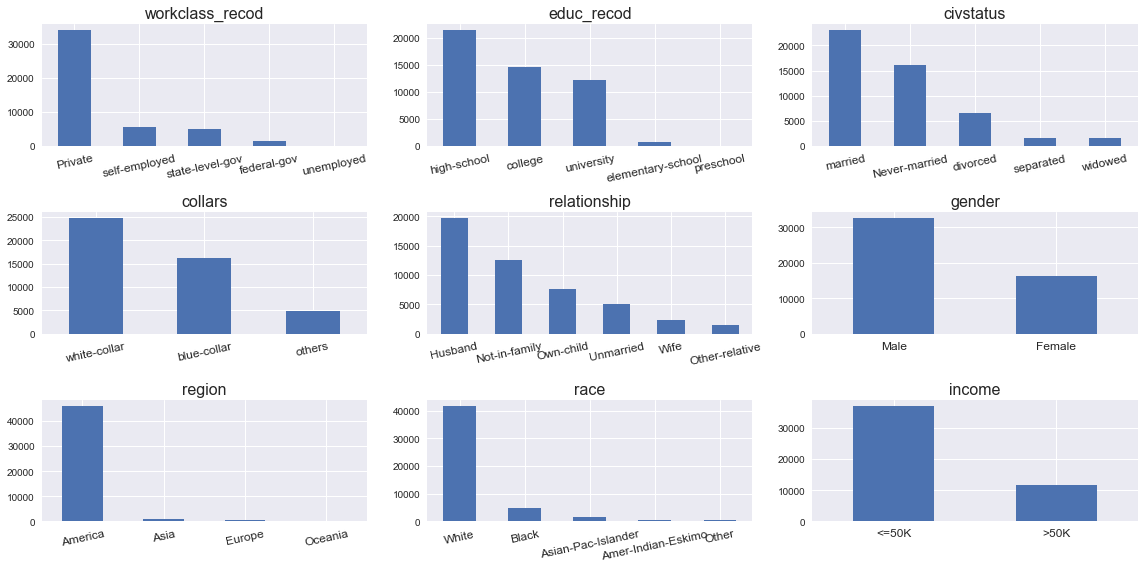

In [134]:
plt.style.use('seaborn')        

plt.figure(figsize=(16,8))

plt.subplot(3,3,1)
df['workclass_recod'].value_counts().plot(kind='bar')
plt.xticks(rotation=12, size=12)
plt.title('workclass_recod', size=16)

plt.subplot(3,3,2)
df['educ_recod'].value_counts().plot(kind='bar')
plt.xticks(rotation=12, size=12)
plt.title('educ_recod', size=16)

plt.subplot(3,3,3)
df['civstatus'].value_counts().plot(kind='bar')
plt.xticks(rotation=12, size=12)
plt.title('civstatus', size=16)


plt.subplot(3,3,4)
df['collars'].value_counts().plot(kind='bar')
plt.xticks(rotation=12, size=12)
plt.title('collars', size=16)

plt.subplot(3,3,5)
df['relationship'].value_counts().plot(kind='bar')
plt.xticks(rotation=12, size=12)
plt.title('relationship', size=16)

plt.subplot(3,3,6)
df['gender'].value_counts().plot(kind='bar')
plt.xticks(rotation=0, size=12)
plt.title('gender', size=16)

plt.subplot(3,3,7)
df['region'].value_counts().plot(kind='bar')
plt.xticks(rotation=12, size=12)
plt.title('region', size=16)

plt.subplot(3,3,8)
df['race'].value_counts().plot(kind='bar')
plt.xticks(rotation=12, size=12)
plt.title('race', size=16)

plt.subplot(3,3,9)
df['income'].value_counts().plot(kind='bar')
plt.xticks(rotation=0, size=12)
plt.title('income', size=16)

plt.tight_layout()

En cuanto a la naturaleza de la organización (workclass_recod), se puede observar que de las 5 clases, existe una mayor frecuencia de los datos se encuentran agrupados en el sector privado, por sobre las otras instituciones, lo cual indica un desbalance.

En el gráfico de región, aparece un mayor número de registros para la clase America, por sobre todos los otros países, lo mismo ocurre con la raza, en donde la mayor cantidad de personas de la muestra son blancos.

#### Graficos de barra de variables categoricas vs vector objetivo:

Text(0, 0.5, 'Proportion of population')

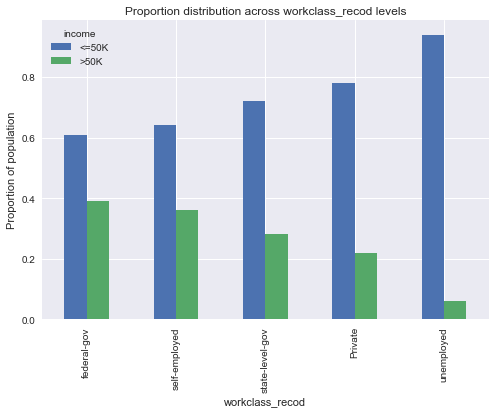

In [135]:
work = round(pd.crosstab(df.workclass_recod, df.income).div(pd.crosstab(df.workclass_recod, df.income).apply(sum,1),0),2)
work.sort_values(by = '<=50K', inplace = True)
ax = work.plot(kind ='bar', title = 'Proportion distribution across workclass_recod levels')
ax.set_xlabel('workclass_recod')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

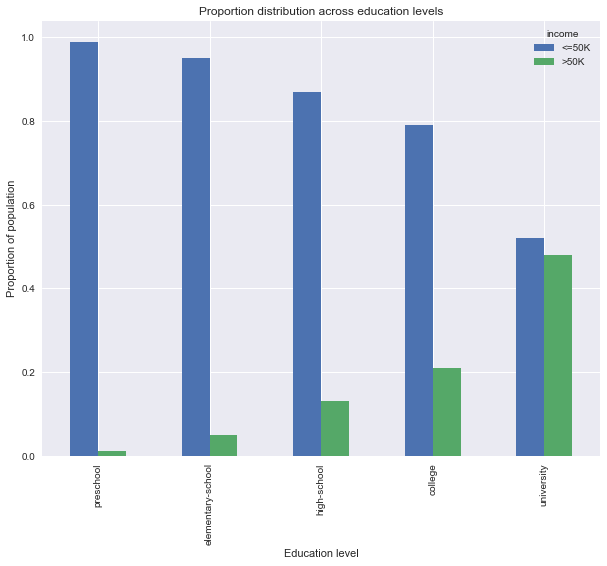

In [136]:
edu_level = {}
for x,y in df[['educational-num','educ_recod']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x

education = round(pd.crosstab(df.educ_recod, df.income).div(pd.crosstab(df.educ_recod, df.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')


Text(0, 0.5, 'Proportion of population')

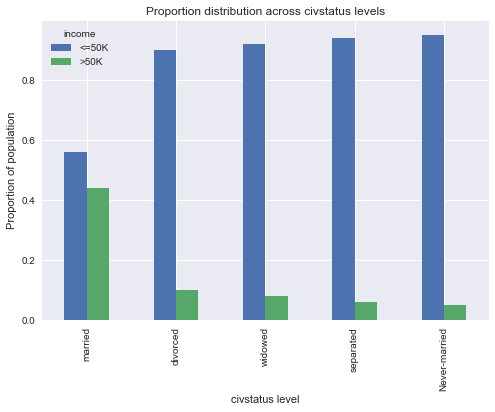

In [137]:
civs = round(pd.crosstab(df.civstatus, df.income).div(pd.crosstab(df.civstatus, df.income).apply(sum,1),0),2)
civs.sort_values(by = '<=50K', inplace = True)
ax = civs.plot(kind ='bar', title = 'Proportion distribution across civstatus levels')
ax.set_xlabel('civstatus level')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

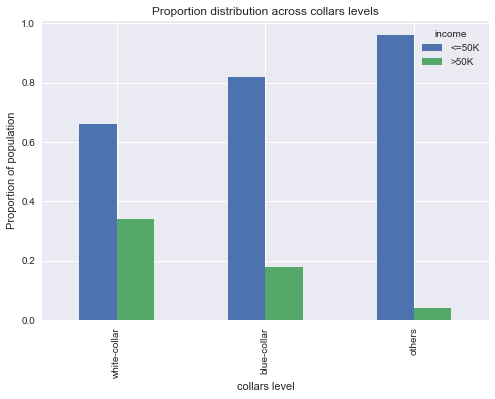

In [138]:
colla = round(pd.crosstab(df.collars, df.income).div(pd.crosstab(df.collars, df.income).apply(sum,1),0),2)
colla.sort_values(by = '<=50K', inplace = True)
ax = colla.plot(kind ='bar', title = 'Proportion distribution across collars levels')
ax.set_xlabel('collars level')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

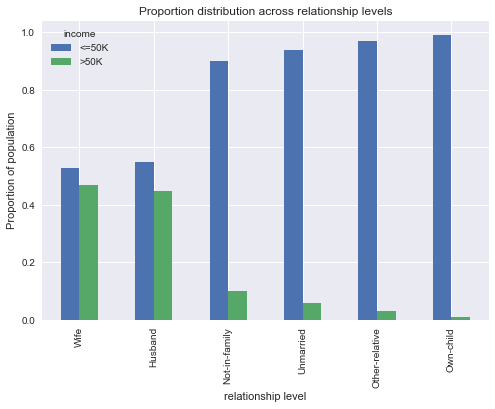

In [139]:
rela = round(pd.crosstab(df.relationship, df.income).div(pd.crosstab(df.relationship, df.income).apply(sum,1),0),2)
rela.sort_values(by = '<=50K', inplace = True)
ax = rela.plot(kind ='bar', title = 'Proportion distribution across relationship levels')
ax.set_xlabel('relationship level')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

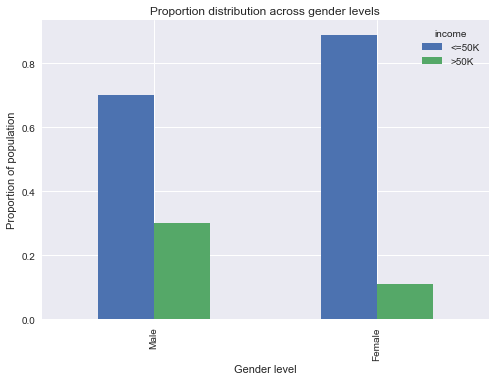

In [140]:
gend = round(pd.crosstab(df.gender, df.income).div(pd.crosstab(df.gender, df.income).apply(sum,1),0),2)
gend.sort_values(by = '<=50K', inplace = True)
ax = gend.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

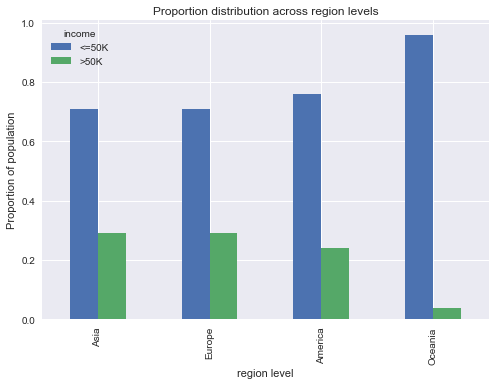

In [141]:
regi = round(pd.crosstab(df.region, df.income).div(pd.crosstab(df.region, df.income).apply(sum,1),0),2)
regi.sort_values(by = '<=50K', inplace = True)
ax = regi.plot(kind ='bar', title = 'Proportion distribution across region levels')
ax.set_xlabel('region level')
ax.set_ylabel('Proportion of population')

Text(0, 0.5, 'Proportion of population')

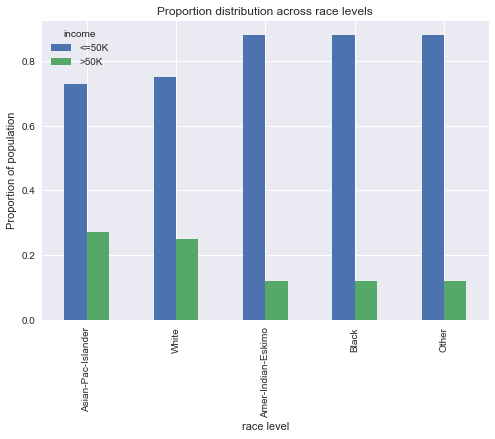

In [142]:
race = round(pd.crosstab(df.race, df.income).div(pd.crosstab(df.race, df.income).apply(sum,1),0),2)
race.sort_values(by = '<=50K', inplace = True)
ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels')
ax.set_xlabel('race level')
ax.set_ylabel('Proportion of population')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

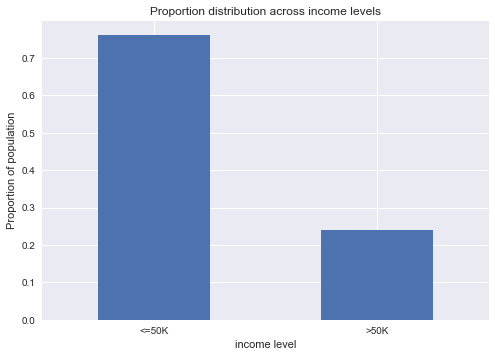

In [143]:
inco = df['income'].value_counts('%')
ax = inco.plot(kind ='bar', title = 'Proportion distribution across income levels')
ax.set_xlabel('income level')
ax.set_ylabel('Proportion of population')

plt.xticks(rotation=0)

Entre de los gráficos mostrados con anterioridad, se observa una proporción similar de ingresos altos con ciertas clases.

Para el caso de educación se muestra claramente, que a mayor nivel de educación, existe una mayor cantidad de personas con ingresos superiores a los 50k. El aumento más grande ocurre entre la educación técnica y la universitaria.

Para el caso de la ocupación (collars), se aprecia como a medida que se aumentan las labores más calificadas, la proporción de salarios sobré los 50k, mientras que ocurre todo lo contrario con los oficios.

En el gráfico de génro vs. ingresos, se ve que hay una diferencia entre hombres y mujeres. Para el caso de las mujeres, la proporción de mujeres con salarios ingeriores a los 50k, es superior al 85% del total.

En cuanto al total de la muestra, alrededor de 3/4 partes de los datos, respecto al ingreso, se encuentran bajo el umbral de los 50 mil dolares.

#### Histogramas de variables numéricas

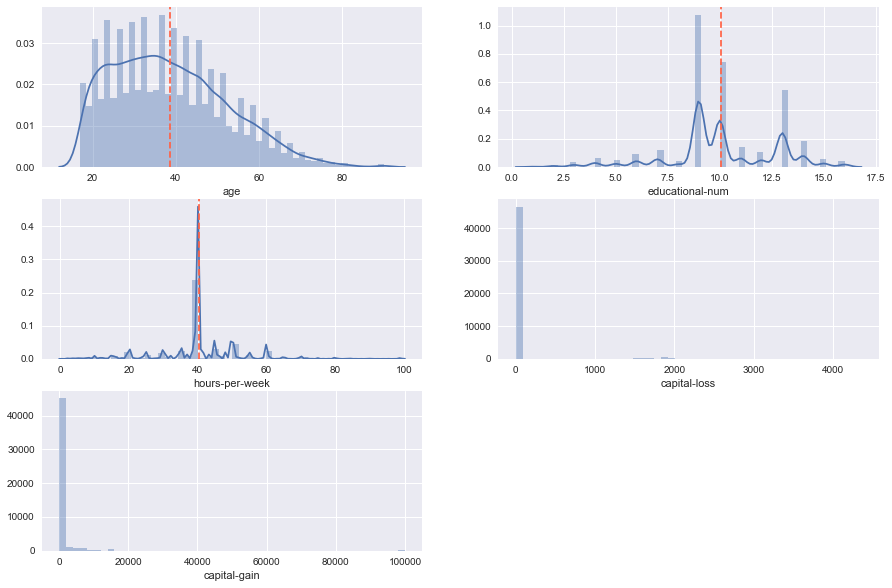

In [144]:
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.distplot(df['age'])
plt.axvline(df['age'].mean(),color='tomato', linestyle='--')

plt.subplot(3,2,2)
sns.distplot(df['educational-num'])
plt.axvline(df['educational-num'].mean(),color='tomato', linestyle='--')

plt.subplot(3,2,3)
sns.distplot(df['hours-per-week'])
plt.axvline(df['hours-per-week'].mean(),color='tomato', linestyle='--')

plt.subplot(3,2,4)
sns.distplot(df['capital-loss'],kde=False)

plt.subplot(3,2,5)
sns.distplot(df['capital-gain'],kde=False)

En cuanto a los gráficos, se puede observar que la edad,es la variable que tiene una mayor variabilidad en cuanto a sus datos en sus datos, ya que la curva es más achatada y distribuida (en torno al eje x) respecto a la media. 

Para el caso de horas por semana, los datos se encuentra bastante ajustados al promedio que es en torno a las 40 hrs, con escaza presencia de valores extremos.

Los gráficos de capital-gain y capital-loss, muestran datos muy extremos y concentrados en un rango de frecuencias alta, por lo tanto se evaluará su consideración en el modelamiento.

#### Heatmap de correlaciones de varialbes numéricas

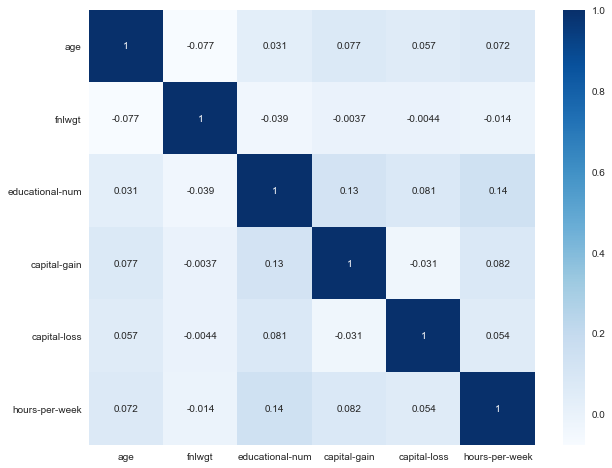

In [145]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True) 

El heat map con las correlaciones, muestra que en general las columnas no tienen correlaciones fuertes. Los valores más altos son entre las siguientes variables:

-income y nivel educacional, con una correlación de 0.33

-income y horas de trabajo por semana, con una correlación de 0.23 

-income y edad, con una correlación de 0.23

Si bien las correlaciones son positivas, por lo tanto están relacionadas de manera directamente proporcional, son débiles, ya que se acercan a 0. 

## Modelación descriptiva

#### Binarización de variables

In [146]:
df_c = df.copy()

In [147]:
df_c.dropna()

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,Male,0,0,40,America,<=50K
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,Male,0,0,50,America,<=50K
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,0,0,40,America,>50K
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,Male,7688,0,40,America,>50K
5,34,Private,198693,high-school,6,Never-married,others,Not-in-family,White,Male,0,0,30,America,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,college,12,married,white-collar,Wife,White,Female,0,0,38,America,<=50K
48838,40,Private,154374,high-school,9,married,blue-collar,Husband,White,Male,0,0,40,America,>50K
48839,58,Private,151910,high-school,9,widowed,white-collar,Unmarried,White,Female,0,0,40,America,<=50K
48840,22,Private,201490,high-school,9,Never-married,white-collar,Own-child,White,Male,0,0,20,America,<=50K


In [148]:
bin_array = ['workclass_recod','educ_recod','civstatus','collars','relationship','race','gender','region','income']

In [149]:
df_c = pd.get_dummies(df_c,drop_first=True,prefix='b',columns=bin_array) #### cocupar para entrenamiento
df_c.columns=df_c.columns.str.replace('-','_')
df_c.rename(columns = {'b_>50K':'income'},inplace=True) 

In [150]:
df_c_z = df_c.copy()  

#### Heatmap con variables binarizadas

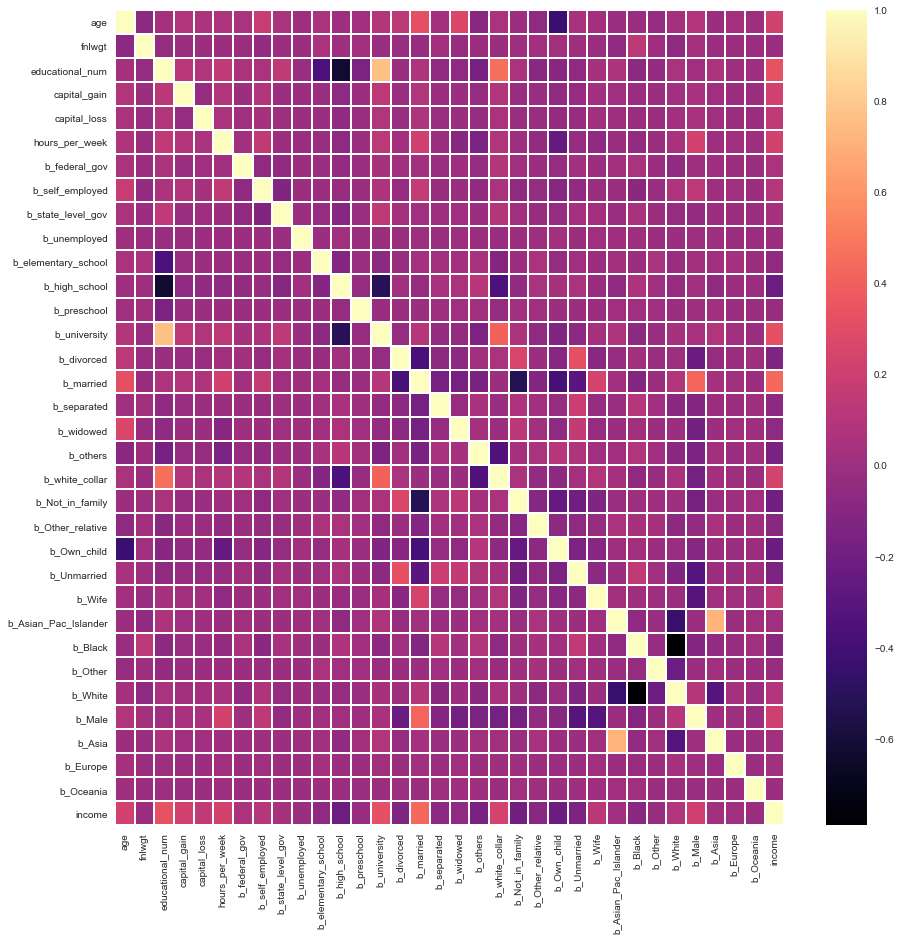

In [151]:
plt.figure(figsize = (15,15))
sns.heatmap(df_c.corr(),cmap='magma',linecolor='white',linewidths=1)

In [152]:
c = df_c.corr()
s = c.unstack()
so = s.sort_values(kind='quicksort')
so[1115:1156-len(df_c.columns)]

income                b_married               0.436624
b_white_collar        educational_num         0.456649
educational_num       b_white_collar          0.456649
b_Asian_Pac_Islander  b_Asia                  0.718240
b_Asia                b_Asian_Pac_Islander    0.718240
educational_num       b_university            0.765192
b_university          educational_num         0.765192
dtype: float64

In [153]:
so[1:7]

b_White          b_Black           -0.791096
b_high_school    educational_num   -0.630421
educational_num  b_high_school     -0.630421
b_Not_in_family  b_married         -0.523657
b_married        b_Not_in_family   -0.523657
b_high_school    b_university      -0.506057
dtype: float64

Una correlación interesante es la de educational-num y b_white_collar, ya que es de un 0.46, lo cual indica que se relacionan de manera directamente proporcional.

Otro correlación que resalta, es la de el grado de educational-num y asistir a la universidad universidad, la cual es una correlación media de 0.77. 

#### Z score

In [154]:
stats.zscore(df_c_z.loc[:,'age':'hours_per_week'])

array([[-0.99512893,  0.35167453, -1.19725891, -0.14480353, -0.2171271 ,
        -0.03408696],
       [-0.04694151, -0.94552415, -0.41933527, -0.14480353, -0.2171271 ,
         0.77292975],
       [-0.77631645,  1.3947231 ,  0.74755018, -0.14480353, -0.2171271 ,
        -0.03408696],
       ...,
       [ 1.41180837, -0.35751025, -0.41933527, -0.14480353, -0.2171271 ,
        -0.03408696],
       [-1.21394141,  0.11198424, -0.41933527, -0.14480353, -0.2171271 ,
        -1.64812038],
       [ 0.97418341,  0.93049361, -0.41933527,  1.87131501, -0.2171271 ,
        -0.03408696]])

In [155]:
df_c_z['age']=stats.zscore(df_c_z.loc[:'age'])
df_c_z['fnlwgt']=stats.zscore(df_c_z.loc[:'fnlwgt'])
df_c_z['educational_num']=stats.zscore(df_c_z.loc[:'educational_num'])
df_c_z['capital_gain']=stats.zscore(df_c_z.loc[:'capital_gain'])
df_c_z['capital_loss']=stats.zscore(df_c_z.loc[:'capital_loss'])
df_c_z['hours_per_week']=stats.zscore(df_c_z.loc[:'hours_per_week'])

In [156]:
df_c_z.head()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,b_federal_gov,b_self_employed,b_state_level_gov,b_unemployed,...,b_Wife,b_Asian_Pac_Islander,b_Black,b_Other,b_White,b_Male,b_Asia,b_Europe,b_Oceania,income
0,-0.995129,-0.995129,-0.995129,-0.995129,-0.995129,-0.995129,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,-0.046942,-0.046942,-0.046942,-0.046942,-0.046942,-0.046942,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,-0.776316,-0.776316,-0.776316,-0.776316,-0.776316,-0.776316,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,0.390683,0.390683,0.390683,0.390683,0.390683,0.390683,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,-1.505691,-1.505691,-1.505691,-1.505691,-1.505691,-1.505691,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Modelamiento de regresión logística

In [157]:
m1 = smf.logit('income ~ age + fnlwgt + educational_num + capital_gain + capital_loss + hours_per_week + b_Male + b_federal_gov + b_self_employed + b_state_level_gov + b_unemployed + b_divorced + b_married + b_separated + b_widowed + b_others + b_white_collar + b_Not_in_family + b_Other_relative + b_Own_child + b_Unmarried + b_Wife + b_Asian_Pac_Islander + b_Black + b_Other + b_White + b_Asia + b_Europe + b_Oceania + b_elementary_school+b_high_school + b_preschool + b_university',df_c_z).fit()

Optimization terminated successfully.
         Current function value: 0.369226
         Iterations 9


In [158]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48813
Method:                           MLE   Df Model:                           28
Date:                Wed, 01 Jul 2020   Pseudo R-squ.:                  0.3290
Time:                        08:00:59   Log-Likelihood:                -18034.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.3353      0.214    -15.555      0.000      -3.756      -2.915
age                      0.0448   1.21e+06   3.69e-08      1.000   -2.38e+06    2.38e+06
fnlwgt                   0.0448   1.21e+06   3.69e-08      1.000   -2.38e+06    2.38e+06
educational_num          0.0448   1.21e+06   3.69e-08      1.000   -2.38e+06    2.38e+06
capital_gain             0.0448   1.21e+06   3.69e-08      1.000   -2.38e+06    2.38e+06
capital_loss             0.0448   1.21e+06   3.69e-08      1.000   -2.38e+06    2.38e+06
hours_per_week           0.0448   1.21e+06   3.69e-08      1.000   -2.38e+06    2.38e+06
b_Male                   0.8952      0.056     15.892      0.000       0.785       1.006
b_federal_gov            0.4583      0.070      6.528      0.000       0.321       0.596
b_self_employed         -0.0759      0.038     -2.017      0.044      -0.150      -0.002
b_state_level_gov       -0.0563      0.042     -1.325      0.185      -0.140       0.027
b_unemployed            -1.2627      0.787     -1.605      0.109      -2.805       0.279
b_divorced               0.6044      0.064      9.474      0.000       0.479       0.729
b_married                1.2384      0.120     10.330      0.000       1.003       1.473
b_separated              0.4671      0.120      3.882      0.000       0.231       0.703
b_widowed                0.5414      0.114      4.762      0.000       0.319       0.764
b_others                -0.7608      0.080     -9.560      0.000      -0.917      -0.605
b_white_collar           0.7836      0.031     25.031      0.000       0.722       0.845
b_Not_in_family         -0.9099      0.117     -7.756      0.000      -1.140      -0.680
b_Other_relative        -1.6013      0.168     -9.559      0.000      -1.930      -1.273
b_Own_child             -2.1789      0.149    -14.670      0.000      -2.470      -1.888
b_Unmarried             -1.2157      0.132     -9.194      0.000      -1.475      -0.957
b_Wife                   0.9244      0.074     12.422      0.000       0.779       1.070
b_Asian_Pac_Islander     0.5481      0.198      2.774      0.006       0.161       0.935
b_Black                  0.2892      0.172      1.681      0.093      -0.048       0.626
b_Other                  0.1435      0.242      0.592      0.554      -0.331       0.618
b_White                  0.5178      0.164      3.152      0.002       0.196       0.840
b_Asia                  -0.2818      0.129     -2.180      0.029      -0.535      -0.028
b_Europe                 0.1960      0.098      1.991      0.046       0.003       0.389
b_Oceania               -1.4173      1.062     -1.334      0.182      -3.499       0.665
b_elementary_school     -1.8910      0.181    -10.476      0.000      -2.245      -1.537
b_high_school           -0.5954      0.034    -17.748      0.000      -0.661      -0.530
b_preschool             -2.8364      1.016     -2.791      0.005      -4.828      -0.844
b_university             0.9715      

Es posible observar que un gran numero de variables tienen un p-value inferior a 0.025. Sin embargo solo algunas tienen un B0 positivo (cercano o superior a 1), como: casado, white collar, Male, federal government, White, University. Esto implica que cuando se interceptan con el eje Y cuando X=0, ya tienen una "base de inicio", respecto a otras variables que hasta tienen valores que podrían ser negativos.

Todas estas clases, mencionadas con anterioridad, tienen una proporción alta, respecto a los ingresos, tal como se mostró en los graficos de barra de variables categoricas vs. vector objetivo.

## Modelación predictiva

In [159]:
X_train, X_test, y_train, y_test = train_test_split(df_c.loc[:,'age':'b_Oceania'],df_c['income'], test_size=.33, random_state=1655)

In [160]:
X_train_std = StandardScaler().fit_transform(X_train)

X_test_std = StandardScaler().fit_transform(X_test)

default_model = LogisticRegression().fit(X_train_std, y_train)

In [161]:
yhat = default_model.predict(X_test_std)
yhat[:20]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
      dtype=uint8)

In [162]:
yhat_pr = default_model.predict_proba(X_test_std)
yhat_pr[:20]

array([[0.71452577, 0.28547423],
       [0.48468192, 0.51531808],
       [0.97170291, 0.02829709],
       [0.81239308, 0.18760692],
       [0.00137671, 0.99862329],
       [0.7379167 , 0.2620833 ],
       [0.70200531, 0.29799469],
       [0.99149888, 0.00850112],
       [0.99739686, 0.00260314],
       [0.11644128, 0.88355872],
       [0.00674728, 0.99325272],
       [0.56846254, 0.43153746],
       [0.979727  , 0.020273  ],
       [0.2392976 , 0.7607024 ],
       [0.9600888 , 0.0399112 ],
       [0.1949557 , 0.8050443 ],
       [0.45457364, 0.54542636],
       [0.33500404, 0.66499596],
       [0.28529144, 0.71470856],
       [0.81760239, 0.18239761]])

#### Matriz de Confusión

In [163]:
m1_conf_pd = pd.crosstab(y_test, yhat)
m1_conf_pd

col_0,0,1
income,,
0,11431,859
1,1546,2282


In [164]:
m1_acc = accuracy_score(y_test, yhat)
m1_acc

0.850787938950242

Accuracy, nos permite saber cuantas veces el modelo obtubo predicciones correctas. Para este caso, esto es que un 85% de las veces la predicción fue óptima. En caso de que exista un desbalance de clases, es mejor tener en cuenta Recall y Precision.

In [165]:
m1_prec = precision_score(y_test, yhat)
m1_rec = recall_score(y_test, yhat)
print("Precision: ", m1_prec, "\nRecall: ", m1_rec)

Precision:  0.7265202164915632 
Recall:  0.5961337513061651


La presición es alta, de un 72%, lo cual nos muestra: de los casos clasificados como positivos, que proporción fueron realmente positivos. 

El Recall de un 0.52, implica la capacidad del modelo de encontrar los casos relevantes.

In [166]:
m1_fscore = f1_score(y_test, yhat)
m1_fscore

0.6549002726359592

En este caso el F1 score es de 0.65, es la media armonica entre Recall y Precision. Nos indica un intercambio entre ambas métricas, los resultados con mayor presición son más cercanos a 1. 